# 数据收集、评估与清洗项目

## 项目背景

本项目将要整理 (以及分析和可视化) 的数据集是推特用户 @dog_rates 的档案, 推特昵称为 WeRateDogs。WeRateDogs 是一个推特主，他以诙谐幽默的方式对人们的宠物狗评分。这些评分通常以 10 作为分母。但是分子则一般大于 10：11/10、12/10、13/10 等等。为什么会有这样的评分？因为 "They're good dogs Brent." WeRateDogs 拥有四百多万关注者，曾受到国际媒体的报道。

WeRateDogs 下载了他们的推特档案，并通过电子邮件发送给优达学城，专门为本项目使用。这个档案是基本的推特数据（推特 ID、时间戳、推特文本等），包含了截止到 2017 年 4 月 1 日的 5000 多条推特。



## 项目目标
清洗 WeRateDogs 推特数据，创建有趣且可靠的分析和可视化。

## 项目细节及步骤
你在这个项目中的任务如下：

数据整理，其中包括：
收集数据
评估数据
清洗数据

对清洗过的数据进行储存、分析和可视化
书面报告 1) 你的数据整理工作 和 2) 你的数据分析和可视化

### 1. 收集以下三份数据，为三种不同的文件类型：

- WeRateDogs 的推特档案。这个数据文件是直接提供的，文件名为twitter_archive_enhanced.csv
- 推特图像的预测数据，即根据神经网络，对出现在每个推特中狗的品种（或其他物体、动物等）进行预测的结果。这个文件你需要使用 Python 的 Requests 库和以下提供的 URL 来进行编程下载。下载用的 URL：https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv 
- 每条推特的额外附加数据，至少要包含转发数（retweet_count）和喜欢数（favorite_count），还可以收集任何你觉得有趣的字段。使用 WeRateDogs 推特档案中的推特 ID，使用 Python Tweepy 库查询 API 中每个推特的 JSON 数据，把所有 JSON 数据存储到一个名为 tweet_json.txt 的文件中。

### 2. 对项目数据进行评估
收集上述三个数据集之后，使用目测评估和编程评估的方式，对数据进行质量和清洁度的评估。在你的 wrangle_act.ipynb Jupyter Notebook 中记录评估过程和结果，最终列出至少 8 个质量问题 和 2 个清洁度问题。要符合项目规范，必须对项目动机中的要求进行评估（参见上一页课程的 关键要点 标题）。

### 3. 对项目数据进行清洗
对你在评估时列出的每个问题进行清洗。在 wrangle_act.ipynb 展示清洗的过程。结果应该为一个优质干净整洁的主数据集（pandas DataFrame 类型） （如果都是以推特 ID 为观察对象的一些特征列，则清理最终只能有一个主数据集，如果有其他观察对象及其对应的特征字段，可以创建其他的数据集，同样需要清理）。同样地，必须符合项目动机的要点要求。

### 4. 对项目数据进行存储、分析和可视化
将清理后的数据集存储到 CSV 文件中，命名为 twitter_archive_master.csv。

在 wrangle_act.ipynb Jupyter Notebook 中对清洗后的数据进行分析和可视化。必须生成至少 3 个见解和 1 个可视化。

### 以下为数据清理和分析的具体步骤。
#### 数据集导入及查看

In [1]:
# 导入清理与分析所需数据包
import pandas as pd
import numpy as np
import requests
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#设置显示每列里的所有内容，而不会被默认砍掉
pd.set_option('display.max_colwidth', -1)

In [3]:
#读入twitter_archive数据集，并查看原始数据
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [4]:
#从已给URL读入用神经网络图片预测的数据集，并查看原始数据
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
response = requests.get(url)

with open(url.split('/')[-1],mode='wb') as file:
    file.write(response.content)

image_predictions = pd.read_csv('image-predictions.tsv',sep='\t')
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [5]:
#查看图片预测数据集信息
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1143,730196704625098752,https://pbs.twimg.com/media/CiIuBwCUgAAAGbz.jpg,1,hand_blower,0.296145,False,chain_mail,0.262271,False,toilet_seat,0.149497,False
1064,715360349751484417,https://pbs.twimg.com/media/Ce14cOvWwAAcFJH.jpg,1,nail,0.855552,False,screw,0.073277,False,padlock,0.023970,False
1991,873580283840344065,https://pbs.twimg.com/media/DB-UotKXkAEHXVi.jpg,1,Newfoundland,0.678537,True,Tibetan_mastiff,0.244022,True,chow,0.048530,True
286,671151324042559489,https://pbs.twimg.com/media/CVBokRSWsAADuXx.jpg,1,Rottweiler,0.781201,True,black-and-tan_coonhound,0.061206,True,kelpie,0.048856,True
648,681694085539872773,https://pbs.twimg.com/media/CXXdJ7CVAAALu23.jpg,1,toy_poodle,0.920992,True,miniature_poodle,0.060857,True,Maltese_dog,0.006064,True
1271,749996283729883136,https://pbs.twimg.com/media/CmfoyrrW8AA8v7w.jpg,1,Old_English_sheepdog,0.515319,True,West_Highland_white_terrier,0.151040,True,soft-coated_wheaten_terrier,0.056420,True
958,705475953783398401,https://pbs.twimg.com/media/CcpaoR9WAAAKlJJ.jpg,1,golden_retriever,0.908784,True,Labrador_retriever,0.030361,True,tennis_ball,0.004996,False
96,667724302356258817,https://pbs.twimg.com/media/CUQ7tv3W4AA3KlI.jpg,1,ibex,0.619098,False,bighorn,0.125119,False,ram,0.074673,False
1348,759557299618865152,https://pbs.twimg.com/media/Cop9VVUXgAAhX9u.jpg,2,golden_retriever,0.763333,True,Chesapeake_Bay_retriever,0.194251,True,Labrador_retriever,0.012225,True
376,673148804208660480,https://pbs.twimg.com/media/CVeBQwiUsAAqhLw.jpg,1,tub,0.873010,False,bathtub,0.091434,False,toilet_seat,0.025456,False


In [6]:
#读入tweet_json数据集，只读入tweet_id, 转发列和点赞列，并查看原始数据
import json
tweet_df = pd.DataFrame()
file = open('tweet_json.txt', 'r')
for line in file.readlines():
    dic = json.loads(line)
    data = {
            'tweet_id':dic['id'],
            'retweet_count':dic['retweet_count'],
            'favorite_count':dic['favorite_count']}
    data_df = pd.DataFrame(data,columns=['tweet_id','retweet_count','favorite_count'],index=[0])   # 这里的 data 是从 dic 中筛选出来的数据，可以构建为一个字典
    tweet_df = pd.concat([data_df, tweet_df])  
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2352 entries, 0 to 0
Data columns (total 3 columns):
tweet_id          2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3)
memory usage: 73.5 KB


### 对三个数据集拷贝副本


In [7]:
#对三个数据集拷贝副本，以下数据清理和分析只在副本的基础上进行
twitter_archive_copy = twitter_archive.copy()
image_predictions_copy = image_predictions.copy()
tweet_df_copy = tweet_df.copy()

### 以下集中对三个数据集visually和programatically进行数据杂乱度查看

In [8]:
#找出twitter_archive中有重复的tweet_id
twitter_archive_copy[twitter_archive_copy['tweet_id'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [9]:
#找出图片预测中重复的tweet_id
image_predictions_copy['tweet_id'].duplicated().sum()

0

In [10]:
#找出tweet_df中重复的tweet_id
tweet_df_copy['tweet_id'].duplicated().sum()

0

以上三个数据集中tweet_id没有重复值。

In [11]:
#查看统计值，img_num列的统计值说明，所用图片大部分都来自图片1
image_predictions_copy.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### 数据质量问题

#### twitter_archive数据集：
1. 我们只需要含有图片的原始评级 (不包括转发和回复的)，需要删除转发和回复的数据。同时，由于twitter_archive数据集有2356行数据，而image_predictions数据集只有2075行，存在没有图片的数据行，需要同时删除。
2. 多列数据缺失严重，包括有in_reply_to_status_id，in_reply_to_user_id，retweeted_status_id，retweeted_status_user_id，retweeted_status_timestamp，expanded_urls
3. timestamp列类型不是时间类型，需转化成时间类型
4. 名字列中，有些数据不准确
5. 打分的分子和分母列中，有些数据不准确
6. 狗的类型列中，有些数据不准确，可能需要手动处理

#### 图片预测数据集
7. 从统计结果来看，大部分都是针对图片p1进行的预测，且由于图片2,3的可信度较低，直接删除针对图片2,3的预测列
8. 删除针对图片p1的预测非狗的行


### 数据清洁度问题
1. 有共同的tweet_id列，三个表格应该合并在一起，尤其是tweet_df只是在twitter_archive基础上的补充
2. doggo, floofer, pupper, puppo 四列表示的实际上是同一个特征，狗狗的地位，按照数据整洁度的标准（Each variable forms a column），应该将其合并为一列来表示，合并时需要注意，存在一只狗狗有多个地位的情况

#### 下面开始处理数据质量问题。

twitter_archive数据集：

1.我们只需要含有图片的原始评级 (不包括转发和回复的)，需要删除转发和回复的数据。同时，由于twitter_archive数据集有2356行数据，而image_predictions数据集只有2075行，存在没有图片的数据行，需要同时删除（这个删除无图片行将在最后三表合并时进行）。

In [12]:
#删除twitter_archive数据集中，转发的行
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy['retweeted_status_id'].isnull()]

#进行检验
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [13]:
#删除twitter_archive数据集中,回复的行
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy['in_reply_to_status_id'].isnull()]

#进行检验
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

由此将转发和回复相关列的数据删除了。

现在处理数据质量问题第2点。

2. 多列数据缺失严重，包括有in_reply_to_status_id，in_reply_to_user_id，retweeted_status_id，retweeted_status_user_id，retweeted_status_timestamp，expanded_urls

In [14]:
#删除转发和回复等数据严重缺失列
twitter_archive_copy = twitter_archive_copy.drop(['source','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                                                  'retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'],axis=1)

#进行检验
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(7)
memory usage: 122.9+ KB


现在处理第3条数据质量问题。
3. timestamp列类型不是时间类型，需转化成时间类型

In [15]:
#对twitter_archive的时间列进行时期和时间的转化
twitter_archive_copy['timestamp'] = pd.to_datetime(twitter_archive_copy['timestamp'])
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 131.1+ KB


下面处理image_predictions数据集中的第7,8条数据质量问题。

7. 从统计结果来看，大部分都是针对图片p1进行的预测，且由于图片2,3的可信度较低，直接删除针对图片2,3的预测列
8. 删除针对图片p1的预测非狗的行

In [16]:
#删除p2,p3相关的预测列，对应于第8条
image_predictions_copy = image_predictions_copy.drop(['img_num','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1)

#进行验证
image_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
dtypes: bool(1), float64(1), int64(1), object(2)
memory usage: 50.7+ KB


In [17]:
#删除非狗预测的行，并进行验证，对应于第7条
image_predictions_copy = image_predictions_copy[image_predictions['p1_dog']==True]

#进行验证
image_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 5 columns):
tweet_id    1532 non-null int64
jpg_url     1532 non-null object
p1          1532 non-null object
p1_conf     1532 non-null float64
p1_dog      1532 non-null bool
dtypes: bool(1), float64(1), int64(1), object(2)
memory usage: 49.4+ KB


#### 接下来会集中处理twitter_archive数据集中的狗名字，评分和狗的地位相关的数据质量问题，即第4,5,6条问题。
4. 名字列中，有些数据不准确
5. 打分的分子和分母列中，有些数据不准确
6. 狗的类型列中，有些数据不准确，可能需要手动处理


首先通过可视化和编程方式查看twitter_archive数据集中的问题。

In [18]:
#首先查看评分分子的数值
twitter_archive_copy['rating_numerator'].value_counts()

12      486
10      436
11      413
13      287
9       153
8       98 
7       52 
14      38 
5       34 
6       32 
3       19 
4       16 
2       9  
1       5  
26      1  
44      1  
165     1  
24      1  
60      1  
50      1  
144     1  
80      1  
84      1  
88      1  
121     1  
204     1  
420     1  
1776    1  
27      1  
45      1  
75      1  
99      1  
0       1  
Name: rating_numerator, dtype: int64

In [19]:
#首先查看评分分母的数值
twitter_archive_copy['rating_denominator'].value_counts()

10     2080
50     3   
11     2   
80     2   
7      1   
170    1   
150    1   
120    1   
110    1   
90     1   
70     1   
40     1   
20     1   
2      1   
Name: rating_denominator, dtype: int64

In [20]:
twitter_archive_copy[twitter_archive_copy['rating_denominator']==7]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,2016-12-19 23:06:23,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7,Sam,None,None,None,None


In [21]:
#查看doogo列的数值
twitter_archive_copy['doggo'].value_counts()

None     2014
doggo    83  
Name: doggo, dtype: int64

In [22]:
#可视化查看一些doggo为真的文字，看看判断是否有误
twitter_archive_copy[twitter_archive_copy['doggo']=='doggo']['text']

9       This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A         
43      Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ  
99      Here's a very large dog. He has a date later. Politely asked this water person to check if his breath is bad. 12/10 good to go doggo https://t.co/EMYIdoblMR          
108     This is Napolean. He's a Raggedy East Nicaraguan Zoom Zoom. Runs on one leg. Built for deception. No eyes. Good with kids. 12/10 great doggo https://t.co/PR7B7w1rUw  
110     Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH                                                                                                                     
121     This is Scout. He just graduated. Officially a doggo now. Have fun with taxes and losing sight of your ambitions. 12/

以下为集中发现有误的一些行，但并不是全部有问题的行。

In [23]:
twitter_archive_copy.loc[200]   #这一行对狗的地位判断有误

tweet_id              854010172552949760                                                                                                                                                  
timestamp             2017-04-17 16:34:26                                                                                                                                                 
text                  At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk
rating_numerator      11                                                                                                                                                                  
rating_denominator    10                                                                                                                                                                  
name                  None                                       

In [24]:
twitter_archive_copy.loc[889]   #这一列对名字的提取有误，应该是Maggie & Lila

tweet_id              759793422261743616                                                                                                                              
timestamp             2016-07-31 16:50:42                                                                                                                             
text                  Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll
rating_numerator      12                                                                                                                                              
rating_denominator    10                                                                                                                                              
name                  Maggie                                                                                                                                         

In [25]:
twitter_archive_copy.loc[956]    #这一行对狗的地位判断有误

tweet_id              751583847268179968                                                                                                                      
timestamp             2016-07-09 01:08:47                                                                                                                     
text                  Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8
rating_numerator      5                                                                                                                                       
rating_denominator    10                                                                                                                                      
name                  None                                                                                                                                    
doggo                 doggo                   

In [26]:
twitter_archive_copy.loc[989]     #狗的名字叫Divine? 不确定

tweet_id              748932637671223296                                                                                   
timestamp             2016-07-01 17:33:49                                                                                  
text                  Say hello to Divine Doggo. Must be magical af. 13/10 would be an honor to pet https://t.co/BbcABzohKb
rating_numerator      13                                                                                                   
rating_denominator    10                                                                                                   
name                  Divine                                                                                               
doggo                 doggo                                                                                                
floofer               None                                                                                                 
pupper  

In [27]:
twitter_archive_copy.loc[1113]   # 这一行无误

tweet_id              733109485275860992                                                        
timestamp             2016-05-19 01:38:16                                                       
text                  Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda
rating_numerator      12                                                                        
rating_denominator    10                                                                        
name                  None                                                                      
doggo                 doggo                                                                     
floofer               None                                                                      
pupper                pupper                                                                    
puppo                 None                                                                      
Name: 1113, dtype: object

In [28]:
twitter_archive_copy.loc[1465]  #两个评分，通过查看图片，应该用10/10的评分，无误。

tweet_id              694352839993344000                                                                                                                                 
timestamp             2016-02-02 02:53:12                                                                                                                                
text                  Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ
rating_numerator      10                                                                                                                                                 
rating_denominator    10                                                                                                                                                 
name                  Oliviér                                                                                                                         

In [29]:
twitter_archive_copy.loc[2334]  #名字有误

tweet_id              666293911632134144                                                                                                                        
timestamp             2015-11-16 16:37:02                                                                                                                       
text                  This is a funny dog. Weird toes. Won't come down. Loves branch. Refuses to eat his food. Hard to cuddle with. 3/10 https://t.co/IIXis0zta0
rating_numerator      3                                                                                                                                         
rating_denominator    10                                                                                                                                        
name                  a                                                                                                                                         
doggo                 None        

In [30]:
twitter_archive_copy.loc[2335]   #名字和评分都有误。

tweet_id              666287406224695296                                                                                                                      
timestamp             2015-11-16 16:11:11                                                                                                                     
text                  This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
rating_numerator      1                                                                                                                                       
rating_denominator    2                                                                                                                                       
name                  an                                                                                                                                      
doggo                 None                    

In [31]:
twitter_archive_copy[twitter_archive_copy['rating_numerator']==1776]  #查看评分分子最大的情况，无误

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,2016-07-04 15:00:45,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776,10,Atticus,None,None,None,None


以上可视化和编程方式发现了一些数据问题。

以下将重新从text列提取狗的名字和评分，并针对个别具体的问题，具体地处理。

In [32]:
#尝试提取text列中的评分，加入了reviewer建议的：需要提取小数，以及只考虑分母为10的倍数的情况。
twitter_archive_rating_extracted = twitter_archive_copy['text'].str.extract('(([0-9]{1,}(\.[0-9]{1,})?)+(\/)+([0-9]{1,}0))')
twitter_archive_rating_extracted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 5 columns):
0    2096 non-null object
1    2096 non-null object
2    4 non-null object
3    2096 non-null object
4    2096 non-null object
dtypes: object(5)
memory usage: 121.3+ KB


In [33]:
twitter_archive_rating_extracted.sample(10)

,0,1,2,3,4
1160,11/10,11,NaN,/,10
2348,10/10,10,NaN,/,10
1854,11/10,11,NaN,/,10
1643,10/10,10,NaN,/,10
62,11/10,11,NaN,/,10
467,13/10,13,NaN,/,10
668,11/10,11,NaN,/,10
1046,11/10,11,NaN,/,10
935,12/10,12,NaN,/,10
1554,10/10,10,NaN,/,10


In [34]:
#查看第二列那四个非null值，即分子为小数的数字
twitter_archive_rating_extracted[twitter_archive_rating_extracted[2].notna()]

,0,1,2,3,4
45,13.5/10,13.5,.5,/,10
695,9.75/10,9.75,.75,/,10
763,11.27/10,11.27,.27,/,10
1712,11.26/10,11.26,.26,/,10


In [35]:
#将提取的ratings的分子和分母分别填入分子列和分母列中，并保存数据集
twitter_archive_copy['rating_numerator']= twitter_archive_rating_extracted[1]
twitter_archive_copy['rating_denominator']= twitter_archive_rating_extracted[4]
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
text                  2097 non-null object
rating_numerator      2096 non-null object
rating_denominator    2096 non-null object
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 178.7+ KB


In [36]:
#从text列中提取狗的名字，采用了review的建议
twitter_archive_name_extracted = twitter_archive_copy['text'].str.extract('((?:This is|named|Meet|Say hello to|name is|Here we have|Here is)\s([A-Z][^\s.,]*))',expand=False)
twitter_archive_name_extracted.sample(10)

,0,1
557,Meet Sonny,Sonny
563,This is Winnie,Winnie
1335,This is Jimothy,Jimothy
338,This is Charlie,Charlie
1492,NaN,NaN
1645,This is Jiminy,Jiminy
898,This is Lilli,Lilli
1624,NaN,NaN
1692,This is Chuck,Chuck
128,Meet Harold,Harold


In [37]:
#将提取的名字填入名字列中，并保存数据集
twitter_archive_copy['name']= twitter_archive_name_extracted[1]
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
text                  2097 non-null object
rating_numerator      2096 non-null object
rating_denominator    2096 non-null object
name                  1422 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 178.7+ KB


### 检查验证，并进一步处理特别的问题

以下将依次对之前发现的具体问题进行验证。

In [38]:
twitter_archive_copy.loc[200]   #这一行对狗的地位判断有误，只能具体针对性进行修改

tweet_id              854010172552949760                                                                                                                                                  
timestamp             2017-04-17 16:34:26                                                                                                                                                 
text                  At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk
rating_numerator      11                                                                                                                                                                  
rating_denominator    10                                                                                                                                                                  
name                  NaN                                        

In [39]:
twitter_archive_copy.loc[200,'doggo']='None'
twitter_archive_copy.loc[200]

tweet_id              854010172552949760                                                                                                                                                  
timestamp             2017-04-17 16:34:26                                                                                                                                                 
text                  At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk
rating_numerator      11                                                                                                                                                                  
rating_denominator    10                                                                                                                                                                  
name                  NaN                                        

In [40]:
twitter_archive_copy.loc[889]   #这一列对名字的提取有误，应该是Maggie & Lila，只能具体赋值修改

tweet_id              759793422261743616                                                                                                                              
timestamp             2016-07-31 16:50:42                                                                                                                             
text                  Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll
rating_numerator      12                                                                                                                                              
rating_denominator    10                                                                                                                                              
name                  Maggie                                                                                                                                         

In [41]:
twitter_archive_copy.loc[889,'name']='Maggie & Lila'
twitter_archive_copy.loc[889]

tweet_id              759793422261743616                                                                                                                              
timestamp             2016-07-31 16:50:42                                                                                                                             
text                  Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll
rating_numerator      12                                                                                                                                              
rating_denominator    10                                                                                                                                              
name                  Maggie & Lila                                                                                                                                  

In [42]:
twitter_archive_copy.loc[956]    #这一行对狗的地位判断有误,具体赋值修改

tweet_id              751583847268179968                                                                                                                      
timestamp             2016-07-09 01:08:47                                                                                                                     
text                  Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8
rating_numerator      5                                                                                                                                       
rating_denominator    10                                                                                                                                      
name                  NaN                                                                                                                                     
doggo                 doggo                   

In [43]:
twitter_archive_copy.loc[956,'doggo'],twitter_archive_copy.loc[956,'pupper']='None','None'    
twitter_archive_copy.loc[956]

tweet_id              751583847268179968                                                                                                                      
timestamp             2016-07-09 01:08:47                                                                                                                     
text                  Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8
rating_numerator      5                                                                                                                                       
rating_denominator    10                                                                                                                                      
name                  NaN                                                                                                                                     
doggo                 None                    

In [44]:
twitter_archive_copy.loc[2334]     #名字已经修正，无误

tweet_id              666293911632134144                                                                                                                        
timestamp             2015-11-16 16:37:02                                                                                                                       
text                  This is a funny dog. Weird toes. Won't come down. Loves branch. Refuses to eat his food. Hard to cuddle with. 3/10 https://t.co/IIXis0zta0
rating_numerator      3                                                                                                                                         
rating_denominator    10                                                                                                                                        
name                  NaN                                                                                                                                       
doggo                 None        

In [45]:
twitter_archive_copy.loc[2335]   #名字已经修正，无误。但是评分都有误，需要赋值修改

tweet_id              666287406224695296                                                                                                                      
timestamp             2015-11-16 16:11:11                                                                                                                     
text                  This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
rating_numerator      9                                                                                                                                       
rating_denominator    10                                                                                                                                      
name                  NaN                                                                                                                                     
doggo                 None                    

In [46]:
twitter_archive_copy.loc[2335,'rating_numerator'],twitter_archive_copy.loc[2335,'rating_denominator'] = 9,10
twitter_archive_copy.loc[2335]

tweet_id              666287406224695296                                                                                                                      
timestamp             2015-11-16 16:11:11                                                                                                                     
text                  This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
rating_numerator      9                                                                                                                                       
rating_denominator    10                                                                                                                                      
name                  NaN                                                                                                                                     
doggo                 None                    

以上发现的数据库质量问题，已经通过编程或手动赋值的方法，进行了修改和验证。

接下来处理数据清洁度中的第二个问题，即
2. doggo, floofer, pupper, puppo 四列表示的实际上是同一个特征，狗狗的地位，按照数据整洁度的标准（Each variable forms a column），应该将其合并为一列来表示，合并时需要注意，存在一只狗狗有多个地位的情况。
以下数据集中的狗的地位4列，doggo, floofer, pupper, puppo，其实是其实并不是都有数值的。需要进一步进行修改，赋值让None为NaN。

因为以上对狗狗地位列已经进行了一些手动的修改，如果采用reviewer建议的第三种从text列自行提取的方法，那么以上手动修改就无效了。因此采用建议的第二种方法。

In [47]:
#将狗狗地位的四列相加
twitter_archive_copy.replace('None',' ', inplace=True)
twitter_archive_copy['dog_status']= twitter_archive_copy[['doggo','floofer','pupper','puppo']].astype(str).sum(axis=1)

#只查看dog_status列中有值的行
twitter_archive_copy[twitter_archive_copy['dog_status']!='    ']

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_status
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,14,10,Cassie,doggo,,,,doggo
12,889665388333682689,2017-07-25 01:55:32,Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,13,10,NaN,,,,puppo,puppo
14,889531135344209921,2017-07-24 17:02:04,This is Stuart. He's sporting his favorite fanny pack. Secretly filled with bones only. 13/10 puppared puppo #BarkWeek https://t.co/y70o6h3isq,13,10,Stuart,,,,puppo,puppo
29,886366144734445568,2017-07-15 23:25:31,This is Roscoe. Another pupper fallen victim to spontaneous tongue ejections. Get the BlepiPen immediate. 12/10 deep breaths Roscoe https://t.co/RGE08MIJox,12,10,Roscoe,,,pupper,,pupper
43,884162670584377345,2017-07-09 21:29:42,Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ,12,10,Yogi,doggo,,,,doggo
46,883360690899218434,2017-07-07 16:22:55,Meet Grizzwald. He may be the floofiest floofer I ever did see. Lost eyes saving a schoolbus from a volcano erpuption. 13/10 heroic as h*ck https://t.co/rf661IFEYP,13,10,Grizzwald,,floofer,,,floofer
49,882762694511734784,2017-07-06 00:46:41,This is Gus. He's quite the cheeky pupper. Already perfected the disinterested wink. 12/10 would let steal my girl https://t.co/D43I96SlVu,12,10,Gus,,,pupper,,pupper
56,881536004380872706,2017-07-02 15:32:16,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,14,10,NaN,,,pupper,,pupper
71,878776093423087618,2017-06-25 00:45:22,This is Snoopy. He's a proud #PrideMonthPuppo. Impeccable handwriting for not having thumbs. 13/10 would love back #PrideMonth https://t.co/lNZwgNO4gS,13,10,Snoopy,,,,puppo,puppo
82,876838120628539392,2017-06-19 16:24:33,This is Ginger. She's having a ruff Monday. Too many pupper things going on. H*ckin exhausting. 12/10 would snug passionately https://t.co/j211oCDRs6,12,10,Ginger,,,pupper,,pupper


In [48]:
#再次验证查看有多个值的行
twitter_archive_copy.loc[191]

tweet_id              855851453814013952                                                                                                                                            
timestamp             2017-04-22 18:31:02                                                                                                                                           
text                  Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel
rating_numerator      13                                                                                                                                                            
rating_denominator    10                                                                                                                                                            
name                  NaN                                                                      

dog_status列中的doggo和puppo之间已经有空格，无需再作其它操作。讽刺的是，单看text，还是看不明白此狗到底属于puppo还是doggo。一直自诩英文很好，现在知道真相的我眼泪掉下来。

In [49]:
#删除狗狗地位的四列，并查看表格
twitter_archive_copy = twitter_archive_copy.drop(['doggo','floofer','pupper','puppo'],axis=1)
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
text                  2097 non-null object
rating_numerator      2096 non-null object
rating_denominator    2096 non-null object
name                  1422 non-null object
dog_status            2097 non-null object
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 154.1+ KB


接下来处理数据清洁度中的第一个问题，即

1. 有共同的tweet_id列，三个表格应该合并在一起，尤其是tweet_df只是在twitter_archive基础上的补充

In [50]:
#用df1.merge(df2,on='name').merge(df3,on='name')的代码合并三个数据集
twitter_archive_master = twitter_archive_copy.merge(image_predictions_copy,on='tweet_id',how='inner').merge(tweet_df_copy,on='tweet_id',how='inner')
#删除多余的列和时间列
twitter_archive_master=twitter_archive_master.drop(['p1_conf','p1_dog'], axis=1)

twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1462
Data columns (total 11 columns):
tweet_id              1463 non-null int64
timestamp             1463 non-null datetime64[ns]
text                  1463 non-null object
rating_numerator      1462 non-null object
rating_denominator    1462 non-null object
name                  1068 non-null object
dog_status            1463 non-null object
jpg_url               1463 non-null object
p1                    1463 non-null object
retweet_count         1463 non-null int64
favorite_count        1463 non-null int64
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 97.2+ KB


In [51]:
twitter_archive_master.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_status,jpg_url,p1,retweet_count,favorite_count
1214,673359818736984064,2015-12-06 04:34:25,This is Steve. He was just relaxing in hot tub when he was intruded upon. 8/10 poor little pup https://t.co/EPq0MRAraJ,8,10,Steve,,https://pbs.twimg.com/media/CVhBLohWEAAXtYl.jpg,English_setter,727,1551
1320,670046952931721218,2015-11-27 01:10:17,This is Ben &amp; Carson. It's impossible for them to tilt their heads in the same direction. Cheeky wink by Ben. 11/10s https://t.co/465sIBdvzU,11,10,Ben,,https://pbs.twimg.com/media/CUx8JSEXIAU6zPp.jpg,Blenheim_spaniel,191,683
221,828650029636317184,2017-02-06 17:02:17,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",14,10,NaN,,https://pbs.twimg.com/media/C3_0yhCWEAETXj2.jpg,golden_retriever,1540,10437
1339,669354382627049472,2015-11-25 03:18:15,Meet Dug. Dug fucken loves peaches. 8/10 https://t.co/JtA1TG21Xx,8,10,Dug,,https://pbs.twimg.com/media/CUoGQjdXAAAkaz2.jpg,Chihuahua,1385,2876
1026,683111407806746624,2016-01-02 02:23:45,This is Larry. He thought the New Year's parties were tonight. 10/10 poor pupper. Maybe next year https://t.co/h3X0jK8MVM,10,10,Larry,pupper,https://pbs.twimg.com/media/CXrmMSpUwAAdeRj.jpg,cocker_spaniel,1029,3723


In [52]:
#将清理过的数据集保存到csv文件
twitter_archive_master.to_csv('twitter_archive_master.csv',index=False)

## 数据分析及可视化

提出以下问题：
1. 被点赞数最多的前10大狗的排名及信息如何？
2. 哪种品种获得的点赞数最多，公众是否对某一品种存在特别好感？
3. 点赞数和转发数是否有强相关性？
4. 点赞数和博主的打分是否有强相关性？

现针对第1个问题进行分析：1. 被点赞数最多的前10大狗的排名及信息如何？

以下对点赞数列进行排序，排出前10大点赞数最多的狗狗。

In [53]:
Top10_df = twitter_archive_master.sort_values('favorite_count',ascending = False)[:10]
Top10_df

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_status,jpg_url,p1,retweet_count,favorite_count
247,822872901745569793,2017-01-21 18:26:02,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,13,10,NaN,puppo,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,Lakeland_terrier,47958,132318
614,744234799360020481,2016-06-18 18:26:18,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,13,10,NaN,doggo,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,Labrador_retriever,79116,130533
51,879415818425184262,2017-06-26 19:07:24,This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY,13,10,Duddles,,https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg,English_springer,45655,107834
324,807106840509214720,2016-12-09 06:17:20,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,13,10,Stephan,,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,Chihuahua,56373,106634
95,866450705531457537,2017-05-22 00:28:40,"This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr",13,10,Jamesy,pupper,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,French_bulldog,32705,106481
267,819004803107983360,2017-01-11 02:15:36,This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,14,10,Bo,doggo,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,standard_poodle,42045,95138
82,870374049280663552,2017-06-01 20:18:38,This is Zoey. She really likes the planet. Would hate to see willful ignorance and the denial of fairly elemental science destroy it. 13/10 https://t.co/T1xlgaPujm,13,10,Zoey,,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,golden_retriever,27502,84753
56,877736472329191424,2017-06-22 03:54:17,This is Aja. She was just told she's a good dog. Suspicions confirmed. 13/10 would tell again https://t.co/lsPyyAiF1r,13,10,Aja,,https://pbs.twimg.com/media/DC5YqoQW0AArOLH.jpg,Chesapeake_Bay_retriever,19908,81450
29,884925521741709313,2017-07-12 00:01:00,"This is Earl. He found a hat. Nervous about what you think of it. 12/10 it's delightful, Earl https://t.co/MYJvdlNRVa",12,10,Earl,,https://pbs.twimg.com/media/DEfjEaNXkAAtPlj.jpg,Italian_greyhound,19149,78881
107,862096992088072192,2017-05-10 00:08:34,We only rate dogs. Please don't send perfectly toasted marshmallows attempting to drive. Thank you... 13/10 https://t.co/nvZyyrp0kd,13,10,NaN,,https://pbs.twimg.com/media/C_bIo7QXYAAGfPu.jpg,chow,24997,77714


In [54]:
#将图片列转成list，用于后续的编程下载图片
img_urls = Top10_df['jpg_url'].tolist()
img_urls

['https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg',
 'https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg',
 'https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg',
 'https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg',
 'https://pbs.twimg.com/media/DC5YqoQW0AArOLH.jpg',
 'https://pbs.twimg.com/media/DEfjEaNXkAAtPlj.jpg',
 'https://pbs.twimg.com/media/C_bIo7QXYAAGfPu.jpg']

In [56]:
#编程从已给的图片链接中下载相关狗狗的文件，首先创建Top10_dogs_images文件夹

folder_name = 'Top10_dogs_images'
if not os.path.exists(folder_name):
    os.mkdir(folder_name)

In [57]:
#要跑通这段代码，vpn需开启全局模式。
#让文件名为Top1.jpg, Top2.jpg...

#由于在上个提交的版本中已经跑通过，这个版本中就没有再跑了，想省点vpn流量。

"""
for url in img_urls:
    img_name = 'Top' + str(img_urls.index(url)+ 1) + '.jpg'   
    response = requests.get(url,headers={'Connection': 'close'}, timeout=10)
    with open(os.path.join(folder_name, img_name), mode='wb') as file:
        file.write(response.content)
"""        

"\nfor url in img_urls:\n    img_name = 'Top' + str(img_urls.index(url)+ 1) + '.jpg'   \n    response = requests.get(url,headers={'Connection': 'close'}, timeout=10)\n    with open(os.path.join(folder_name, img_name), mode='wb') as file:\n        file.write(response.content)\n"

以上编程下载了点赞数前十大的狗狗的图片到工作文件夹。文件夹在打包的项目附件中。


以下分析第二个问题：2. 哪种品种获得的点赞数最多，公众是否对某一品种存在特别好感？

Text(0.5,1,'Mean Favorite Count of Different Dog Breeds')

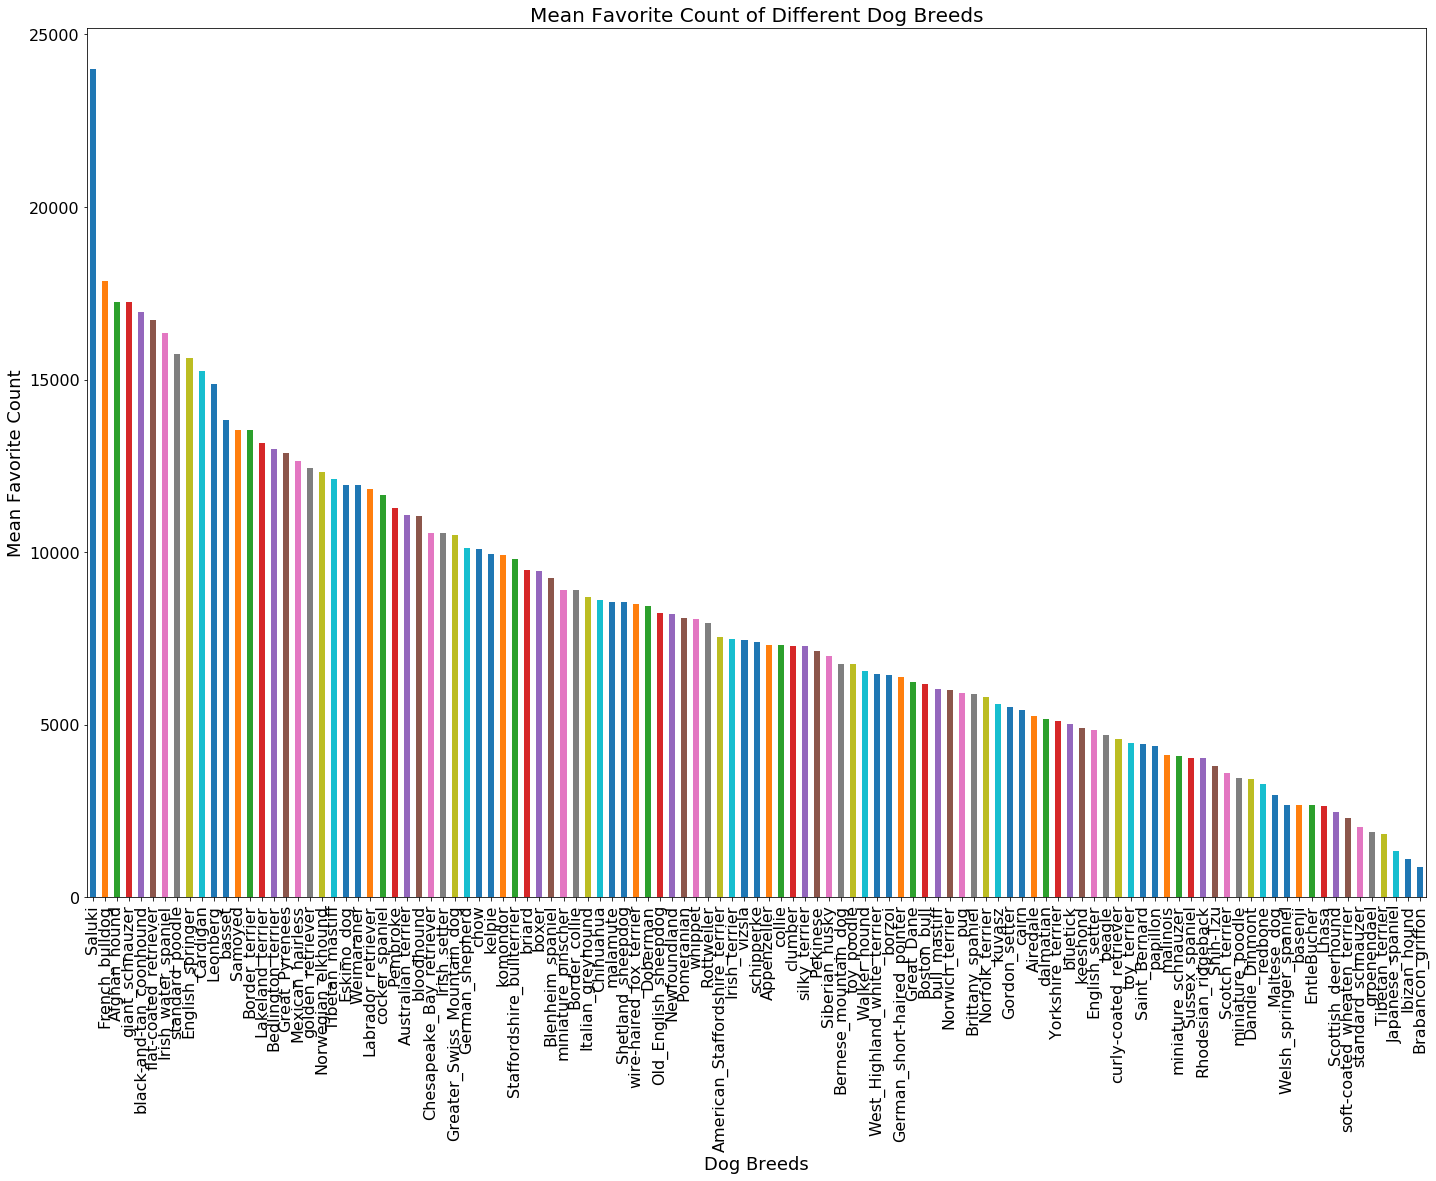

In [58]:
#通过p1列的狗的品种所获得的平均点赞数，依次从大到小排序并画柱状图
favorite_mean = twitter_archive_master.groupby('p1')['favorite_count'].mean().sort_values(ascending=False)
favorite_mean.plot(kind='bar',fontsize=16,figsize=(24,16))
plt.ylabel('Mean Favorite Count',size=18)
plt.xlabel('Dog Breeds', size=18)
plt.title('Mean Favorite Count of Different Dog Breeds',size=20)

以上通过p1列的狗的品种所获得的平均点赞数，依次从大到小排序并画柱状图。

由上图可见，最受欢迎的前三大品种为Saluki，French bulldog和Afghan hound。而且第一名的Saluki所获得点赞数远超第二名之后的点赞数。



In [59]:
twitter_archive_master[twitter_archive_master['p1']=='Saluki']

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_status,jpg_url,p1,retweet_count,favorite_count
43,881666595344535552,2017-07-03 00:11:11,This is Gary. He couldn't miss this puppertunity for a selfie. Flawless focusing skills. 13/10 would boop intensely https://t.co/7CSWCl8I6s,13,10,Gary,,https://pbs.twimg.com/media/DDxPFwbWAAEbVVR.jpg,Saluki,11026,51390
58,877316821321428993,2017-06-21 00:06:44,"Meet Dante. At first he wasn't a fan of his new raincoat, then he saw his reflection. H*ckin handsome. 13/10 for water resistant good boy https://t.co/SHRTIo5pxc",13,10,Dante,,https://pbs.twimg.com/media/DCza_vtXkAQXGpC.jpg,Saluki,5377,27835
277,817120970343411712,2017-01-05 21:29:55,Name a more iconic quartet... I'll wait. 13/10 for all https://t.co/kCLgD8687T,13,10,NaN,,https://pbs.twimg.com/media/C1b_LSYUsAAJ494.jpg,Saluki,3004,13331
574,750056684286914561,2016-07-04 20:00:23,This is Jameson. He had a few too many in the name of freedom. I can't not respect that. 11/10 'Merica https://t.co/8zQvXM6pG5,11,10,Jameson,,https://pbs.twimg.com/media/Cmfx2oNW8AAGg4H.jpg,Saluki,1006,3429


下载第一张点赞数最多的Gary狗狗的图片，这个品种长这个样子的。感受一下。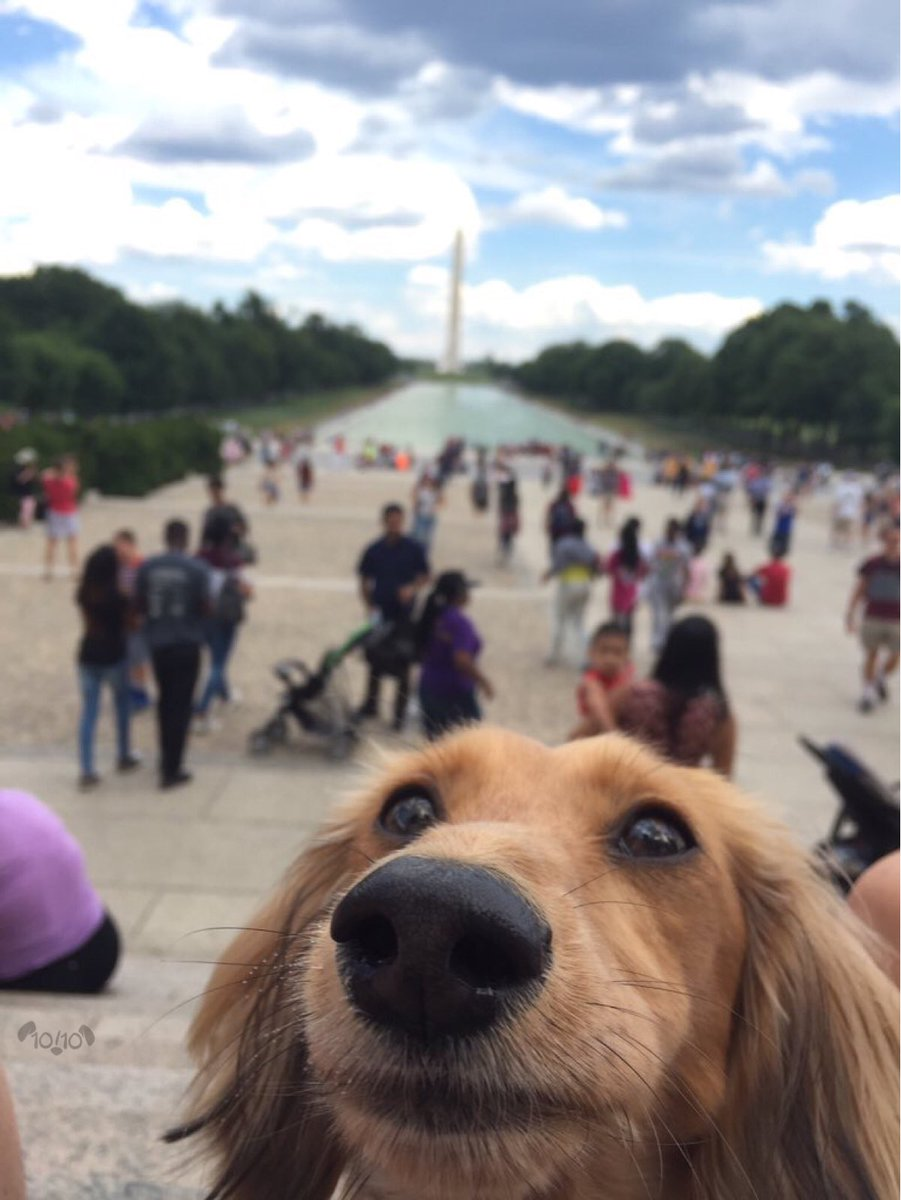

以下分析第三个问题：3. 点赞数和转发数是否有强相关性？



In [60]:
#查看点赞数和转发数的相关性
twitter_archive_master['favorite_count'].corr(twitter_archive_master['retweet_count'])

0.9116740950568187

0.9117的相关系数说明，点赞数和转发数的相关性较强，即通常点赞数越多，转发数也越多。

以下分析第四个问题：4. 点赞数和博主的打分是否有强相关性？

首先需要对分子分母列进行处理，得出一个最终打分列。再与点赞数进行相关性分析。

In [61]:
twitter_archive_master['rating'] = twitter_archive_master['rating_numerator'].astype(float)/twitter_archive_master['rating_denominator'].astype(float)
twitter_archive_master['favorite_count'].corr(twitter_archive_master['rating'])

0.45304802686506745

以上0.4531的相关系数说明，点赞数和博主的打分相关性并不太强。博主极具娱乐性的主观打分和大众的普遍感受不完全一致。娱乐性也是博主的一大特色。

不过此次修改过的系数0.4531，已经高于上次报告的0.3040。这个改变的原因在于提取打分的时候，根据建议，考虑到了更多提取不正确的因素而修改了提取正则表达式。

## 参考资料

http://discussions.youdaxue.com/t/json-tweet-json-txt-python/53815

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html

http://songhuiming.github.io/pages/2017/04/02/jupyter-and-pandas-display/

https://stackoverflow.com/questions/29902714/print-the-complete-string-of-a-pandas-dataframe

https://stackoverflow.com/questions/51103686/converting-pandas-column-to-datetime

https://stackoverflow.com/questions/26763344/convert-pandas-column-to-datetime

https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns

http://www.runoob.com/regexp/regexp-syntax.html

https://stackoverflow.com/questions/13842088/set-value-for-particular-cell-in-pandas-dataframe-using-index

https://stackoverflow.com/questions/23743460/replace-none-with-nan-in-pandas-dataframe

Review建议及干货
https://review.udacity.com/#!/reviews/1504550

https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-dataframe-in-pandas-python










